In [1]:
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers


In [2]:
df=pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


<b>We have missing values and non numbers</b>

In [5]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
# this just converts the value of column to 0 or 1
# factorize in pandas works too, but only one column at a time
from sklearn.preprocessing import LabelEncoder
variables = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
encoder = LabelEncoder()
df[variables] = df[variables].apply(encoder.fit_transform)


In [8]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [12]:
# this makes multiple columns with the variable (Separate for yes/no)
from sklearn.preprocessing import OneHotEncoder
variables = ['furnishingstatus']

# use encoder
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[variables]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)

KeyError: "None of [Index(['furnishingstatus'], dtype='object')] are in the [columns]"

In [13]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


In [16]:
df = df.drop('furnishingstatus_unfurnished', axis=1)

In [17]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0


In [18]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished'],
      dtype='object')

In [19]:
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished']]

y=df[['price']]

In [20]:
X_train, X_temp, y_train, y_temp = train_test_split(X,y, test_size=0.3, random_state=101)

X_val, X_test, y_val, y_test=train_test_split(X_temp, y_temp, test_size=0.5, random_state=101)

In [21]:
print(len(X_train))
print(len(X_val))
print(len(X_test))

381
82
82


In [22]:
var_ammount=len(X.columns)

In [23]:
model = keras.Sequential(
    [
        layers.Dense(16, activation="relu", input_shape=(var_ammount,)),
        layers.Dense(32, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1)
    ]
)


model.compile(optimizer='adam', loss='mse')


model.summary()

c:\Users\janni\OneDrive\Fächer - Uni\5.Semester\DeepL\Test\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,313 (5.13 KB)

 Trainable params: 1,313 (5.13 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.fit(x=X_train, y=y_train, epochs=800, validation_data=(X_val, y_val))

Epoch 1/800
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 25525391196160.0000 - val_loss: 25239299817472.0000
Epoch 2/800
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26857627975680.0000 - val_loss: 25232226123776.0000
Epoch 3/800
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23971137323008.0000 - val_loss: 25225276162048.0000
Epoch 4/800
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25121240645632.0000 - val_loss: 25217709637632.0000
Epoch 5/800
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25774656585728.0000 - val_loss: 25208662523904.0000
Epoch 6/800
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26470426607616.0000 - val_loss: 25196658425856.0000
Epoch 7/800
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27559687356416.0000 - val_loss: 25180663447552.0000
Epoch 8/800
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23650187083776.0000 - val_loss: 25160012791808.0000
Epoch 9/800
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25935162114048.0000 - val_loss: 25131518787584.0000


<Axes: >

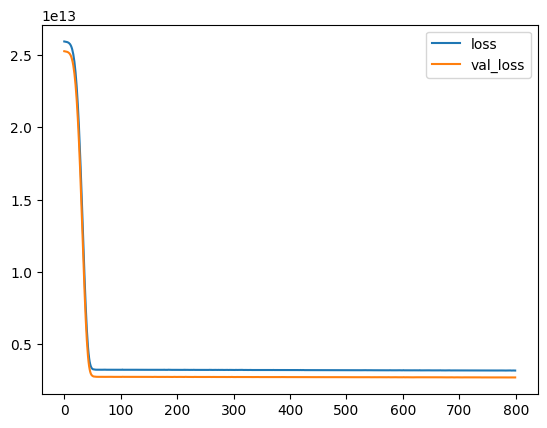

In [25]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [26]:
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
4216106254336.0

Train data evaluation:
3197397106688.0


In [27]:
test_predictions = model.predict(X_test)

# reshape the data for easier comparison table
test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

# print the comparison table - true values vs. model predicted values
# we can nicely see here how far off our model is in some cases
pred_df

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


,Test True Y,Model Predictions
0,7140000,5132662.00
1,4620000,2487306.25
2,8855000,5493854.00
3,2100000,2586053.50
4,4095000,3461590.25
...,...,...
77,3773000,7017251.00
78,4480000,3438806.75
79,4305000,8792101.00
80,4375000,3339329.00


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

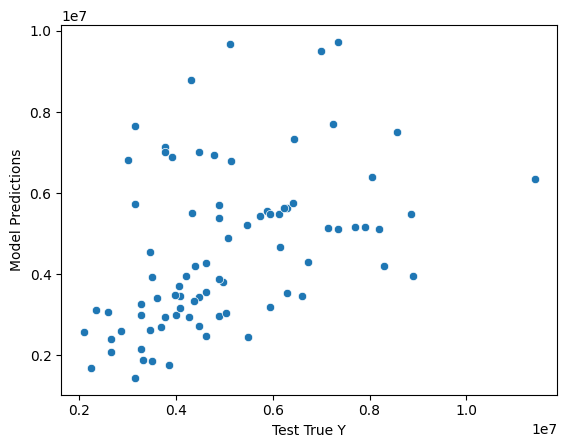

In [28]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [29]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "Unit")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "Unit^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "Unit")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

# Explained Variance Score => 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
# high variance score = model is a good fit for the data 
# low variance score = model is not a good fit for the data
# the higher the score, the model is more able to explain the variation in the data
# if score is low, we might need more and better data
print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
1606935.83 Unit

MSE
4216106435901.35 Unit^2

RMSE:
2053315.96 Unit

R-squared:
-0.26

Explained variance score:
-0.2


82

 Predictions 

82


C:\Users\janni\AppData\Local\Temp\ipykernel_27968\1872061308.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - test_predictions))
c:\Users\janni\OneDrive\Fächer - Uni\5.Semester\DeepL\Test\.venv\lib\site-packages\seaborn\distributions.py:2464: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
c:\Users\janni\OneDrive\Fächer - Uni\5.Semester\DeepL\Test\.venv\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\janni\OneDrive\Fächer - Uni\5.Semester\DeepL\Test\.venv\lib\site-packages\numpy\lib\histograms.py:885: Runti

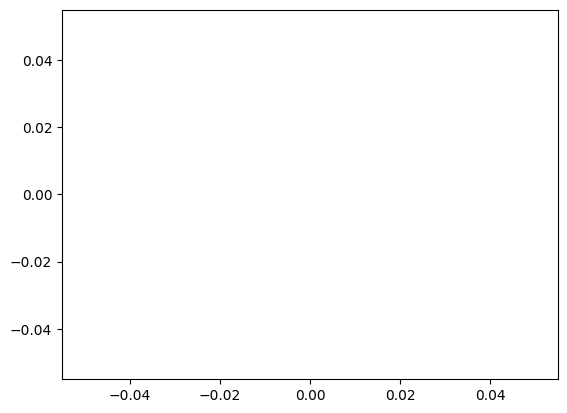

In [41]:
print(len(y_test))
print("\n Predictions \n")
print(len(test_predictions))
sns.distplot((y_test - test_predictions))
plt.show()
plt.close()

In [37]:
df.head()



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0


In [39]:
tester_row = {
'area': 7420, 
'bedrooms':4, 
'bathrooms':2, 
'stories':3, 
'mainroad':1,
'guestroom':0,
'basement':0, 
'hotwaterheating':0, 
'airconditioning':1,
'parking':2, 
'prefarea':1, 
'furnishingstatus_furnished':1,
'furnishingstatus_semi-furnished':0
}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])

In [1]:
result = model.predict(tester_row)[0]

print()
print(f"Estimated Price:")
print(f"{round(float(result), 2)}")
print("----------------")

NameError: name 'model' is not defined